<a href="https://colab.research.google.com/github/Naresh0298/Machine-Learning-Projects/blob/main/Linear_Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [3]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
df = pd.read_csv(url)
df


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [4]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:

# Drop the missing values
data = df.dropna()



In [7]:

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [10]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        # dm= 2/n * mean of (predictions-actual) * input
        dm = 2 * np.mean(np.multiply(train_input, df))
        # dc = 2/n * mean of (predictions-actual)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,
        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Iteration = 1, Loss = 4150.944192901305
Iteration = 1, Loss = 507.11245026299065
Iteration = 1, Loss = 67.99107065153514
Iteration = 1, Loss = 15.0721655713681
Iteration = 2, Loss = 8.69486158404464
Iteration = 3, Loss = 7.926327025024813
Iteration = 4, Loss = 7.833710220472174
Iteration = 5, Loss = 7.8225488611214065
Iteration = 6, Loss = 7.821203769372384
Iteration = 7, Loss = 7.821041644699182
Iteration = 8, Loss = 7.821022080435121
Iteration = 9, Loss = 7.821019696254465
Iteration = 10, Loss = 7.821019382463492
Iteration = 11, Loss = 7.821019318179671
Iteration = 12, Loss = 7.8210192839668435
Iteration = 13, Loss = 7.821019253380568
Iteration = 14, Loss = 7.821019223233997
Iteration = 15, Loss = 7.821019193143076
Iteration = 16, Loss = 7.821019163061534
Iteration = 17, Loss = 7.821019132983784
Iteration = 18, Loss = 7.821019102909155
Iteration = 19, Loss = 7.821019072837568
Iteration = 20, Loss = 7.821019042769012


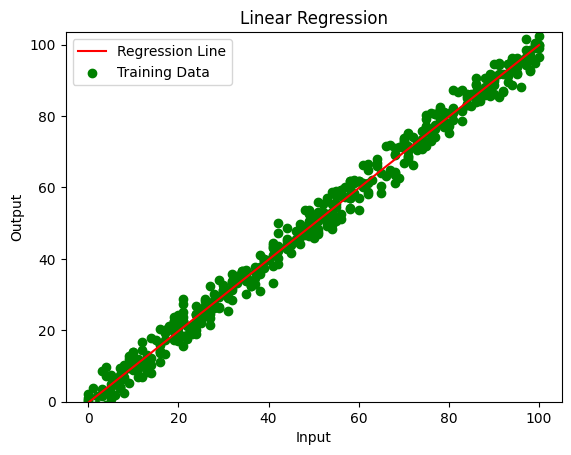

In [11]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


In [13]:
!git init

["\x1bhint: Using 'master' as the name for the initial branch. This default branch name\x1b[m",
 '\x1bhint: is subject to change. To configure the initial branch name to use in all\x1b[m',
 '\x1bhint: of your new repositories, which will suppress this warning, call:\x1b[m',
 '\x1bhint: \x1b[m',
 '\x1bhint: \tgit config --global init.defaultBranch <name>\x1b[m',
 '\x1bhint: \x1b[m',
 "\x1bhint: Names commonly chosen instead of 'master' are 'main', 'trunk' and\x1b[m",
 "\x1bhint: 'development'. The just-created branch can be renamed via this command:\x1b[m",
 '\x1bhint: \x1b[m',
 '\x1bhint: \tgit branch -m <name>\x1b[m',
 'Initialized empty Git repository in /content/.git/']